In [2]:
import os
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
import soundfile as sf

# from soundbay.utils.metadata_processing import create_wav_info_df, convert_month_annotation_to_file_anotation
from soundbay.utils.metadata_processing import get_wav_info_df, add_month_acc_duration, load_annotation_correct_file_time, get_dir_wav_info, load_dir_annotation_with_file_time

BASE_PATH = Path(os.getcwd())
DATASET_PATH = BASE_PATH / "datasets/fannie_project"
print(DATASET_PATH)

/mnt/d/DeepVoice/soundbay/datasets/fannie_project


In [3]:
wav_df = get_dir_wav_info(DATASET_PATH)
wav_df = add_month_acc_duration(wav_df)
wav_df.head()

,wav_file,duration,sample_rate,rec_id,date_time,month,month_year,accumulated_duration
0,/mnt/d/DeepVoice/soundbay/datasets/fannie_proj...,840.025500,96000,5756,2021-04-15 18:29:58,4,4-2021,0.000000
1,/mnt/d/DeepVoice/soundbay/datasets/fannie_proj...,840.004667,96000,5756,2021-04-15 19:29:58,4,4-2021,840.025500
2,/mnt/d/DeepVoice/soundbay/datasets/fannie_proj...,840.008000,1000,5756,2021-04-15 20:29:58,4,4-2021,1680.030167
3,/mnt/d/DeepVoice/soundbay/datasets/fannie_proj...,840.022000,1000,5756,2021-04-15 21:29:58,4,4-2021,2520.038167
4,/mnt/d/DeepVoice/soundbay/datasets/fannie_proj...,840.023000,1000,5756,2021-04-15 22:29:58,4,4-2021,3360.060167


In [30]:
# append CALL types mad_blue annotation
unit_1_mad_blue_annotation = load_dir_annotation_with_file_time(DATASET_PATH / "CallUnitsAndNoise" / "MAD_BLUE" / "UNIT_1", DATASET_PATH, filename_suffix=".Mad.unit.1.selections.txt")
unit_2_mad_blue_annotation = load_dir_annotation_with_file_time(DATASET_PATH / "CallUnitsAndNoise" / "MAD_BLUE" / "UNIT_2", DATASET_PATH, filename_suffix=".Mad.unit.2.selections.txt")

print(f"Unit 1 mad blue annotation shape: {unit_1_mad_blue_annotation.shape}")
print(f"Unit 2 mad blue annotation shape: {unit_2_mad_blue_annotation.shape}")

Unit 1 mad blue annotation shape: (33, 13)
Unit 2 mad blue annotation shape: (61, 13)


In [31]:
unit_1_mad_blue_annotation.head()

,selection,view,channel,begin_time,end_time,low_freq,high_freq,wav_file,filename,call_length,date_time,duration,accumulated_duration
0,1,Spectrogram 1,1,672.328848,691.501536,31.6,34.5,5756.210426052958.wav,LF_5756.210426052958.Mad.unit.1.selections.txt,19.172688,2021-04-26 05:29:58,839.975,0.000
1,2,Spectrogram 1,1,35.553320,53.236867,31.0,35.1,5756.210426072958.wav,LF_5756.210426052958.Mad.unit.1.selections.txt,17.683547,2021-04-26 07:29:58,840.028,1679.957
2,3,Spectrogram 1,1,81.530543,96.608094,31.3,34.2,5756.210426072958.wav,LF_5756.210426052958.Mad.unit.1.selections.txt,15.077551,2021-04-26 07:29:58,840.028,1679.957
3,4,Spectrogram 1,1,143.516029,160.827291,31.0,34.8,5756.210426072958.wav,LF_5756.210426052958.Mad.unit.1.selections.txt,17.311262,2021-04-26 07:29:58,840.028,1679.957
4,5,Spectrogram 1,1,160.585316,171.940015,31.6,34.5,5756.210426072958.wav,LF_5756.210426052958.Mad.unit.1.selections.txt,11.354699,2021-04-26 07:29:58,840.028,1679.957


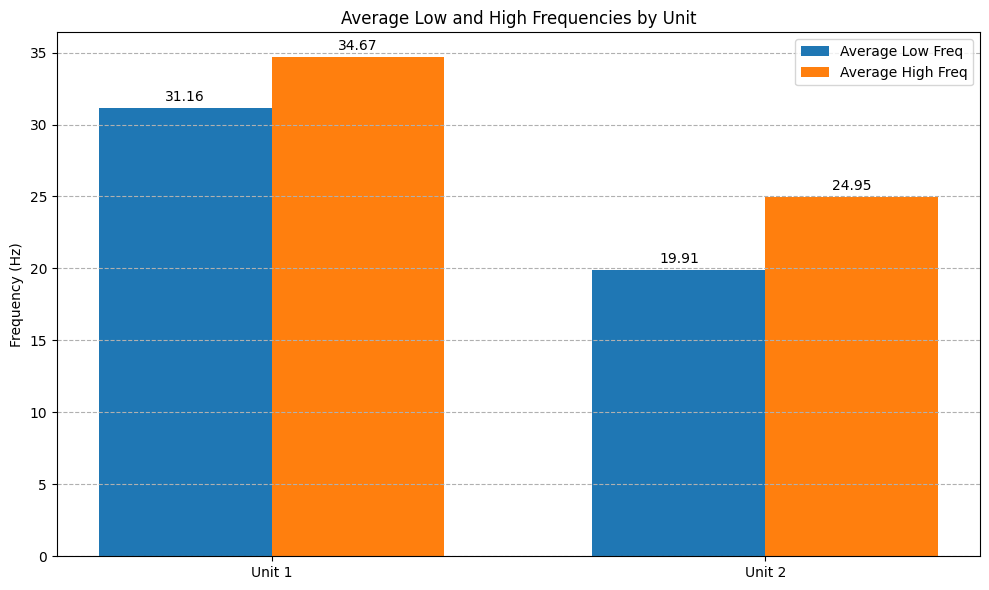

In [38]:
import matplotlib.pyplot as plt

# Calculate average frequencies for Unit 1
unit1_avg_low = unit_1_mad_blue_annotation['low_freq'].mean()
unit1_avg_high = unit_1_mad_blue_annotation['high_freq'].mean()

# Calculate average frequencies for Unit 2
unit2_avg_low = unit_2_mad_blue_annotation['low_freq'].mean()
unit2_avg_high = unit_2_mad_blue_annotation['high_freq'].mean()

# Data for plotting
labels = ['Unit 1', 'Unit 2']
low_freqs = [unit1_avg_low, unit2_avg_low]
high_freqs = [unit1_avg_high, unit2_avg_high]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, low_freqs, width, label='Average Low Freq')
rects2 = ax.bar(x + width/2, high_freqs, width, label='Average High Freq')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Low and High Frequencies by Unit')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

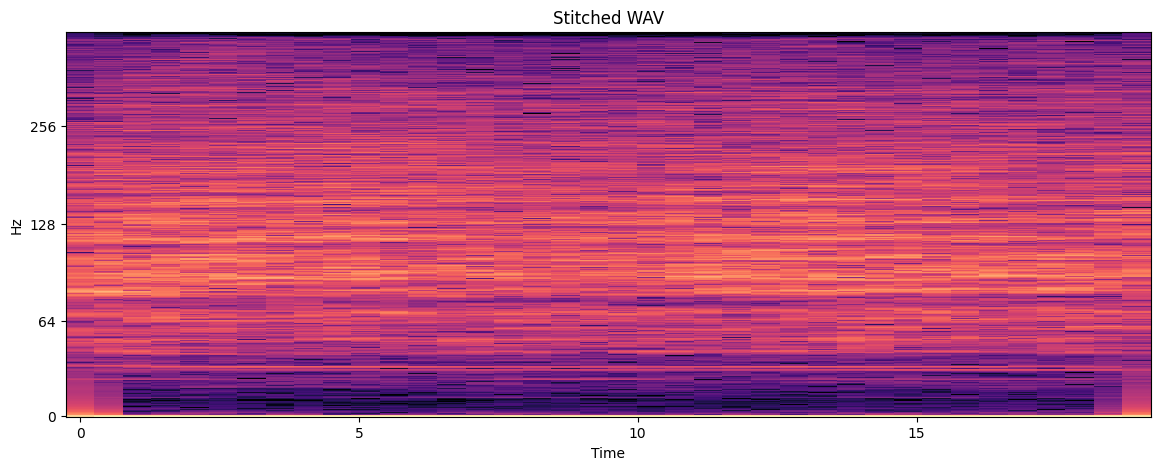

In [34]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

wav, sr = librosa.load(DATASET_PATH / unit_1_mad_blue_annotation.wav_file.iloc[0], sr=None)

start_sample = int(unit_1_mad_blue_annotation.begin_time.iloc[0] * sr)
end_sample = int(unit_1_mad_blue_annotation.end_time.iloc[0] * sr)

stitch_wav = wav[start_sample:end_sample]

plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(stitch_wav, n_fft=2048)), ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title(f"Stitched WAV")
plt.show()

100%|██████████| 33/33 [00:00<00:00, 154.85it/s]


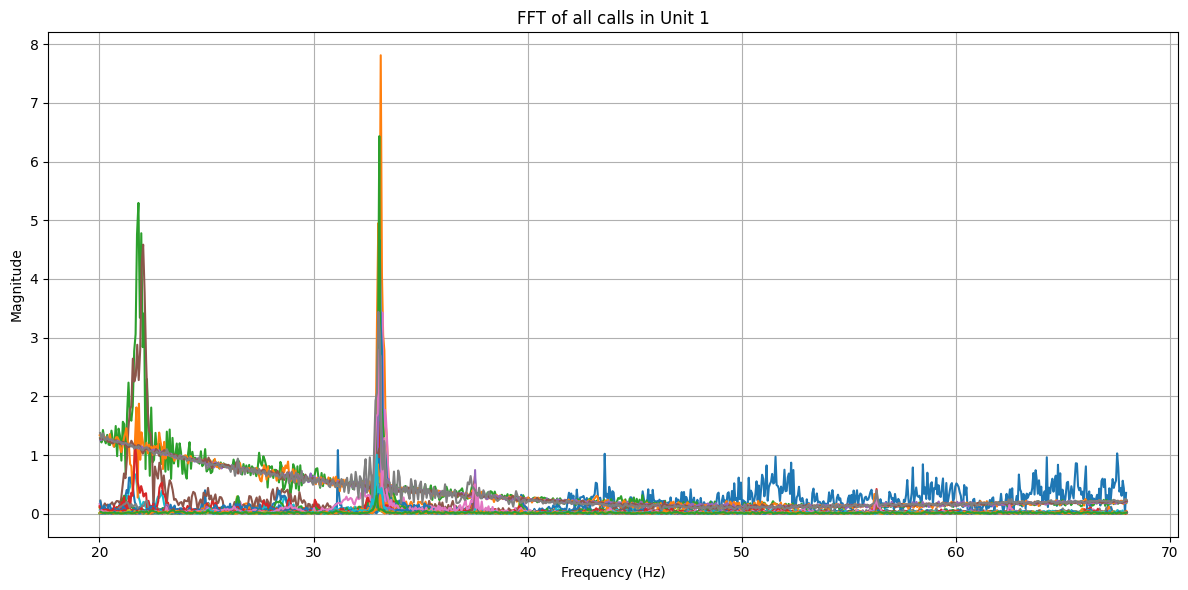

In [40]:
min_freq = 20
max_freq = 68

# Create a figure to plot all the FFTs
plt.figure(figsize=(12, 6))

plt.title("FFT of all calls in Unit 1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Cache for loaded audio files to avoid redundant loading
loaded_audio = {}

# Iterate over each annotation in the dataframe
for index, row in tqdm(unit_1_mad_blue_annotation.iterrows(), total=unit_1_mad_blue_annotation.shape[0]):
    wav_path = DATASET_PATH / row.wav_file
    
    # Check if the audio file is already loaded
    if wav_path not in loaded_audio:
        try:
            wav, sr = librosa.load(wav_path, sr=None)
            loaded_audio[wav_path] = (wav, sr)
        except Exception as e:
            print(f"Could not load file {wav_path}: {e}")
            continue
    else:
        wav, sr = loaded_audio[wav_path]

    # Calculate start and end samples for the call
    start_sample = int(row.begin_time * sr)
    end_sample = int(row.end_time * sr)

    # Ensure sample indices are within the bounds of the audio array
    if start_sample < 0 or end_sample > len(wav):
        # print(f"Skipping row {index} due to out-of-bounds sample indices.")
        continue
        
    # Crop the audio to get the call
    call_wav = wav[start_sample:end_sample]

    if len(call_wav) == 0:
        # print(f"Skipping row {index} due to empty crop.")
        continue

    # Compute the FFT
    fft_result = np.fft.fft(call_wav)
    fft_freq = np.fft.fftfreq(len(call_wav), 1/sr)
    
    # Get the magnitude and keep only the positive frequencies
    magnitude = np.abs(fft_result)
    positive_freq_mask = (fft_freq >= min_freq) & (fft_freq <= max_freq)
    
    # Plot the positive frequency spectrum
    plt.plot(fft_freq[positive_freq_mask], magnitude[positive_freq_mask])

plt.grid(True)
plt.tight_layout()
plt.show()

100%|██████████| 61/61 [00:00<00:00, 157.69it/s]


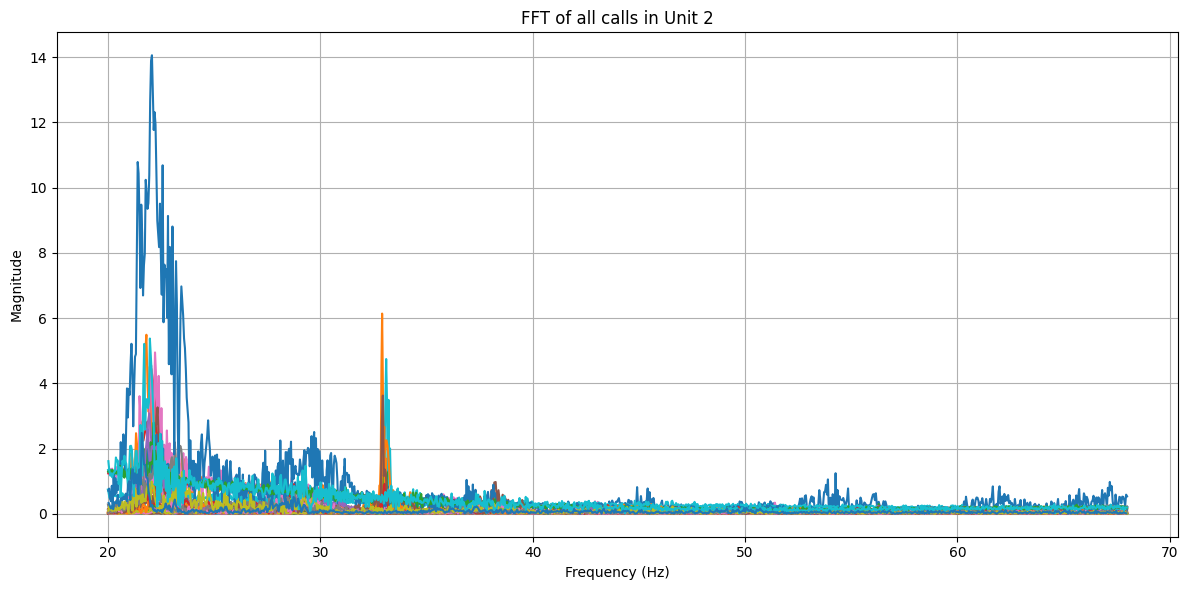

In [42]:
# Create a figure to plot all the FFTs
plt.figure(figsize=(12, 6))
plt.title("FFT of all calls in Unit 2")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Cache for loaded audio files to avoid redundant loading
loaded_audio = {}

# Iterate over each annotation in the dataframe
for index, row in tqdm(unit_2_mad_blue_annotation.iterrows(), total=unit_2_mad_blue_annotation.shape[0]):
    wav_path = DATASET_PATH / row.wav_file
    
    # Check if the audio file is already loaded
    if wav_path not in loaded_audio:
        try:
            wav, sr = librosa.load(wav_path, sr=None)
            loaded_audio[wav_path] = (wav, sr)
        except Exception as e:
            print(f"Could not load file {wav_path}: {e}")
            continue
    else:
        wav, sr = loaded_audio[wav_path]

    # Calculate start and end samples for the call
    start_sample = int(row.begin_time * sr)
    end_sample = int(row.end_time * sr)

    # Ensure sample indices are within the bounds of the audio array
    if start_sample < 0 or end_sample > len(wav):
        # print(f"Skipping row {index} due to out-of-bounds sample indices.")
        continue
        
    # Crop the audio to get the call
    call_wav = wav[start_sample:end_sample]

    if len(call_wav) == 0:
        # print(f"Skipping row {index} due to empty crop.")
        continue

    # Compute the FFT
    fft_result = np.fft.fft(call_wav)
    fft_freq = np.fft.fftfreq(len(call_wav), 1/sr)
    
    # Get the magnitude and keep only the positive frequencies
    magnitude = np.abs(fft_result)
    positive_freq_mask = (fft_freq >= min_freq) & (fft_freq <= max_freq)
    
    # Plot the positive frequency spectrum
    plt.plot(fft_freq[positive_freq_mask], magnitude[positive_freq_mask])

plt.grid(True)
plt.tight_layout()
plt.show()

61it [00:00, 177.42it/s]                        


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (61,) + inhomogeneous part.

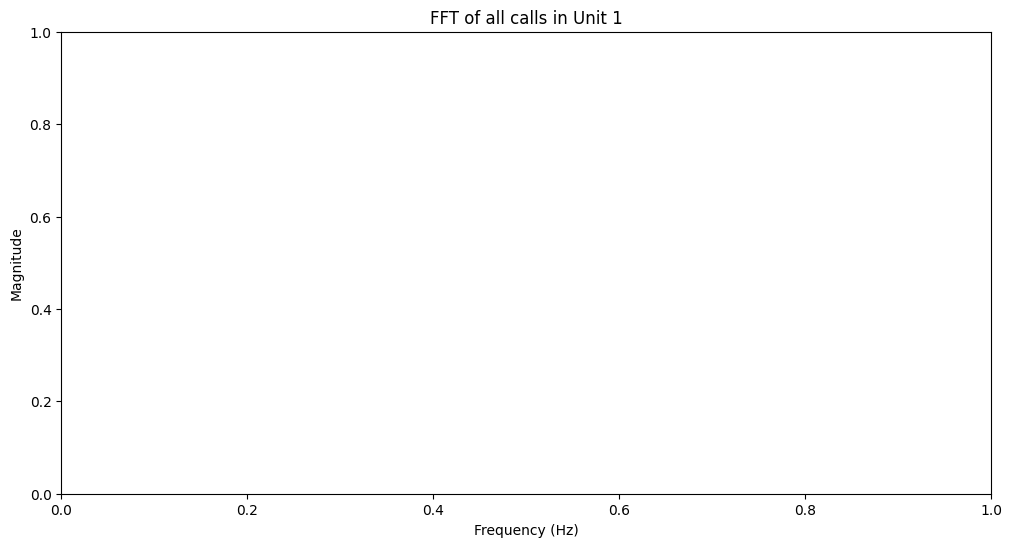

In [37]:
# Create a figure to plot all the FFTs
plt.figure(figsize=(12, 6))
plt.title("FFT of all calls in Unit 1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Cache for loaded audio files to avoid redundant loading
loaded_audio = {}

ffts = []
# Iterate over each annotation in the dataframe
for index, row in tqdm(unit_2_mad_blue_annotation.iterrows(), total=unit_1_mad_blue_annotation.shape[0]):
    wav_path = DATASET_PATH / row.wav_file
    
    # Check if the audio file is already loaded
    if wav_path not in loaded_audio:
        try:
            wav, sr = librosa.load(wav_path, sr=None)
            loaded_audio[wav_path] = (wav, sr)
        except Exception as e:
            print(f"Could not load file {wav_path}: {e}")
            continue
    else:
        wav, sr = loaded_audio[wav_path]

    # Calculate start and end samples for the call
    start_sample = int(row.begin_time * sr)
    end_sample = int(row.end_time * sr)

    # Ensure sample indices are within the bounds of the audio array
    if start_sample < 0 or end_sample > len(wav):
        # print(f"Skipping row {index} due to out-of-bounds sample indices.")
        continue
        
    # Crop the audio to get the call
    call_wav = wav[start_sample:end_sample]

    if len(call_wav) == 0:
        # print(f"Skipping row {index} due to empty crop.")
        continue

    # Compute the FFT
    fft_result = np.fft.fft(call_wav)
    fft_freq = np.fft.fftfreq(len(call_wav), 1/sr)
    
    # Get the magnitude and keep only the positive frequencies
    magnitude = np.abs(fft_result)
    positive_freq_mask = (fft_freq >= 15) & (fft_freq <= 68)    
    ffts.append(magnitude[positive_freq_mask])

unit1_ffts = np.array(ffts)
mean_fft = np.mean(unit1_ffts, axis=0)

ffts = []
for index, row in tqdm(unit_2_mad_blue_annotation.iterrows(), total=unit_2_mad_blue_annotation.shape[0]):
    wav_path = DATASET_PATH / row.wav_file
    
    # Check if the audio file is already loaded
    if wav_path not in loaded_audio:
        try:
            wav, sr = librosa.load(wav_path, sr=None)
            loaded_audio[wav_path] = (wav, sr)
        except Exception as e:
            print(f"Could not load file {wav_path}: {e}")
            continue
    else:
        wav, sr = loaded_audio[wav_path]

    # Calculate start and end samples for the call
    start_sample = int(row.begin_time * sr)
    end_sample = int(row.end_time * sr)

    # Ensure sample indices are within the bounds of the audio array
    if start_sample < 0 or end_sample > len(wav):
        # print(f"Skipping row {index} due to out-of-bounds sample indices.")
        continue
        
    # Crop the audio to get the call
    call_wav = wav[start_sample:end_sample]

    if len(call_wav) == 0:
        # print(f"Skipping row {index} due to empty crop.")
        continue

    # Compute the FFT
    fft_result = np.fft.fft(call_wav)
    fft_freq = np.fft.fftfreq(len(call_wav), 1/sr)
    
    # Get the magnitude and keep only the positive frequencies
    magnitude = np.abs(fft_result)
    positive_freq_mask = (fft_freq >= 15) & (fft_freq <= 68)
    
    ffts.append(magnitude[positive_freq_mask])

ffts = np.array(ffts)
mean_fft_2 = np.mean(ffts, axis=0)
plt.plot(fft_freq[positive_freq_mask], mean_fft, label="Unit 1 Mean FFT")
plt.plot(fft_freq[positive_freq_mask], mean_fft_2, label="Unit 2 Mean FFT")
plt.title("Mean FFT Comparison between Unit 1 and Unit 2")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()